# Feature Preprocessing & Generation

Feature preprocessing and generation depends on the type model we are using. For example, tree-based models require/behave differently than non-tree-based models (such as linear models, NN, and KNN) so we may change the preprocessing/generation of features given the type of the model we are working with.For example, we don't use one-hot encoding with decision trees but it is required with linear models.

## Numerical Features

### Feature Preprocessing

1. Scaling:
    - Tree-based models are not affected by the scale of the features because the decision tree uses rank of the feature to find the best split and doesn't care about the scale of the features.
    - Non-tree-based models suffer from features that have different scaling especially models that use gradient descent and distance metrics. Also, regularization proportionally affected by scaling.

Therefore, scaling is required for non-tree-based models.

Note that there are many ways to scale features and they have different effects on the performance of the model.
- Min-Max scaler = $\frac{(X - min(X))}{(max(X) - min(X)}$. This will make the feature have the values [0,1]. This method; however, does not change the distribution of the values.
- Standardization = $\frac{(X - mean(X)}{std(X)}$. This will result in change in the distribution of the data to have mean = 0 and standard deviation = 1.

2. Outliers:
    - Outliers can be in features or target values. Outliers affect mainly non-tree-based models especially NN and linear models. It either changes the coefficient of that feature or shift the line up/down to get closer to the outliers.
    - We can solve the issue of outliers by clipping the values of features to be either between 1th and 99th percentile or 5th and 95th percentile. We can remove rows that have huge values to get stable predictions.
    - `Rank` the feature can help us solve for outliers and bringing the outliers closer to other values and make the values have equal distance from each other. It first sorts the values and then replace each value by its rank. This is crucial for non-tree-based models especially if we don't have time to work on outliers. We can use scipy.rankdata.
    - Note that outliers affect the scaling of features.

3. Transformation:
    - Such as log(1 + x) or sqrt(x + 2/3).
    - This will make outliers close to the average value and values close to zero more distinguishable. NN get better results with such transformations.

### Feature Generation

It helps with all types of models even with tree-based models such as GBDT since it finds difficulty with multiplications and devisions. It requires prior knowledge and also EDA.

## Categorical Features

We have two kinds of categorical features: Ordinal and Nominal.
1. Ordinal:
    - There is a meaning in the order of the categories such as small < big.
2. Nominal:
    - There is no order in the categories such as colors.
3. Methods:
    - LabelEncoding and FrequencyEncoding are helpful for tree-based models.
    - OneHotEncoding is often used for non-tree-based models.
    - Interactions of categorical features can help linear models and KNN.

## Datetime Features

1. Periodicity:
    - Day number in week, month, year, etc.
    - It is helpful to figure out patterns in the data such as spikes on given days.
2. Time since:
    - Last holiday, event, etc.
    - Row-independent moments such as days since something happened.
    - Row-dependent moments such as days until next holiday or days past after last holiday.
3. Difference between dates:
    - Take the difference between dates.

## Coordinates

- Interesting places in train/test data.
- Center of clusters.
- Aggregated statistics.

## Missing Values

Missing values can be: empty string, NaNs, -1, 99, etc. Sometimes we can tell if the number is missing using histograms. Usually the peak that looks an outliers are missing values. 

Approaches:
1. Replace with something like -999, -1, etc. It hurts the performance of NN and linear models.
2. Mean/Median imputation. It is mainly beneficial for NN and linear models.
3. Reconstruct value using IterativeImputer or KNNImputer.

Usually missing values have info behind them so it is recommended to use an indicator that check if a row has missing value. XGBoost and CatBoost can handle missing values better than the approaches discussed earlier. Note that sometimes we may replace outliers with missing values. Try to avoid filling nans before feature generation.

# Feature Extraction

## Text

Some of the most used preprocessing on text are: lowercase, stemming, lemmatization, and stopwords (don't contain important information such as 'the'). We can decide on the minimum_freq, max_freq, and max_features when using feature extraction.
1. Bag of words:
    - Assumes words independent and create one column for each feature. We can use something like CountVectorizer, TfidfCountVectorizer to get such matrices.
    - Since non-tree-based models depend on the scaling of features, we can do the following postprocessing after CountVectorizer:
        - Normalize the rows to have sum of 1 by dividing the frequency by total frequency in the document (document-wise normalization).
        - Normalize the columns (words) so that less frequent words have more importance than frequent words (column-wise normalization).
        - We can achieve the above two normalization using TFIDF.
    - We can also use n-grams using either words or chars. ngram_range and analyzer help us achieve that. N-grams allow us to discover relationships between words/chars using their local context.
    - Pros: Meaning of each value is known.
    - Cons: Very large vectors.
  
2. Embeddings:
    - Convert documents into dense vectors such that similar words are close in the new space.
    - Some examples are word2vec and GloVe, Doc2vec. We can use the pretrained models.
    - We can either take the average/sum of the words vectors or use Doc2vec.
    - Pros: Dense vectors, and similar words have similar embeddings.
    - Cons: Meaning of values will be mostly lost.

## Images

We can use either pre-trained models or train one from scratch. For most cases, using pre-trained models will be good enough. We can also fine-tune the pre-trained models to get a boost in performance.

# EDA

Advantages of EDA:
- Better understand the data.
- Build an intuition about the data.
- Generate hypothesis.
- Find insights.

Steps of EDA:
1. Get domain knowledge - this means:
    - Reading about the topic/problem we are trying to solve.
    - Understand the meaning of the columns and what they measure.
2. Check if the data is intuitive - this means:
    - Checking if the values in each column are intuitive.
3. Understand how the data was generated - it is crucial to understand the generation process to set up a proper validation scheme. For example, if the training data was generated by different algorithm than the test data, this will make it hard to use portion of the training data as a validation set because training and test have two different distributions. Therefore, in the worst cases, at least the validation and test sets have to come from the same distribution so that the scores on validation set would be a good proxy for the scores on the test set.

## Visualizations

- Histograms: Good to see the distribution of the features. Vary the number of the bins/bin size to get clear picture. Otherwise, histograms can deceive sometimes. It is recommended to use Empirical Distributions to get clear picture about the distribution.

- Plot Index Vs Value: This will show us if there are both horizontal/vertical patterns, i.e. if the data is properly shuffled (no vertical patterns) and if there are a lot of repeated values (horizontal patterns). To make it even more helpful, we can color the dots by the target values.

`plt.plot(x, '.')`

- Scatter plot: It is helpful to see relationships between two features (we can also color it by the target values). We can also see if the train/test have overlapping values. If the test set have different values than train set, that is problematic.

- We can plot the correlation matrix.
- We can do some kind of clustering and see which group of features are similar. We can add features such as aggregate statistics per group and use them as new features.
- We can also test and see how many different distinct combinations there are between features as well as how many times a feature is greater than the other one.
- We can compute the mean of each feature and use a scatter plot where the y-axis would have the means and the x-axis would have the feature names sorted by their mean values. We can sometimes see groups of features that have similar means and generate features accordingly.

## Dataset Cleaning

- It is better to remove constant features, df.nunique(axis=1) == 1.
- Drop duplicated columns, df.T.drop_duplicates(). If we have categorical features, we can use pandas.factorize that label encodes categories by order they appear so that it allows us to see the duplicates. df[feat].factorize() then df.T.drop_duplicates().
- Check if there are common rows in the train and test sets. Remove them in case there are any.
- Check if the data is shuffled.

# Validation

The whole idea behind validation set is to have dataset that best approximate the model score when tested on unseen data. Therefore, this will help us avoid overfitting. Also, the validation data should have the same distribution as the test set. In some cases, training data may have different distribution than the test set.
> Overfitting means that the validation error starts increasing (change direction from decreasing) because it starts capturing noise and patterns that are specific to the training data and are not present in the test data. Overfitting doesn't mean that training error is less than validation error because almost always training error is less than validation error.
> Underfitting means the model couldn't capture the underlying relationship in the data.

Validation strategies (Use with *Stratification*):
- Holdout: Be careful from having duplicate rows between training and validation sets.
    - `sklearn.model_selection.train_test_split`
- K-fold Cross Validation.
    - `sklearn.model_selection.KFold`
- LeaveOneOut.
    - `sklearn.model_selection.LeaveOneOut`

Data splitting strategies:
- Make train/valid split as similar as possible to train/test splits.
- For time-dependent data, validation should be in the future.
- Random (row-wise). The underlying assumption is that the rows are independent. Therefore, if there are some kind of dependencies between the rows, we can design new features that exploit this and boost our model.
- Time-wise. We can create features such as average number of same day last week/month/year.
- Ids. If the training set has completely different set of ids than the test set, then we have to do the same thing when we split the training data into train/valid data. Also, probably creating new features such as aggregate stats per id would not help too.

Issues with validations:
- Too diverse and inconsistent data.
- Too little data.

To solve for this issue, use CV and try to mimic train/test split.

# Data Leakage

- Make sure there is not information from the future such as weather or user history.
- Check if metadata includes some info about the future.
- Ids are supposed to be generated by the system and should not be useful; however, sometimes they contain information that improves the model's performance.
- Row order can be included as a feature and can contain information about the target because rows next to each other have same target value.

# Metrics

Good models don't necessarily have higher results for all metrics. At the beginning of the training, all metrics tend to improve. As the training continues, the metric we optimize for keeps improving while other metrics tend to usually deteriorate. Otherwise, we get suboptimal results if all the metrics for a given model have superior results. 

## Regression

### Mean Squared Error (MSE) 

$$MSE = \frac{1}{N}\sum_{i=1}^N(y_i - \hat{y_i})^2$$
It measures average squared error for the dataset. It is the default error used in ML. MSE curve is hyper-parabola and if we want to use a constant as a baseline that minimize MSE (minimum point), this would be the *Mean* of $y$ ($\bar{y})$. It puts bigger weights on higher values which makes it very sensitive to outliers. In other words, it tries to close the gap with the high values at the expense of the small target values; i.e. close the gap with the peak.

### Root Mean Squared Error (RMSE) 

$$RMSE = \sqrt{\frac{1}{N}\sum_{i=1}^N(y_i - \hat{y_i})^2} = \sqrt{MSE}$$
The main advantage of using RMSE is that it has the same unit as the target variable so it would be easier to explain it; unlike MSE that is square that unit.

Every minimizer of MSE is a minimizer of RMSE and vise versa because square/square root are monotonic non-decreasing functions. In practice, people usually optimize for MSE but report the RMSE when done because MSE is easier to work with.

The gradients of RMSE is different than RMSE because it depends on MSE (dynamic); therefore, it is different for gradient-based algorithms. We may need to change learning rates to account for that.
$$\frac{\partial{RMSE}}{\partial{y_i}} = \frac{1}{2\sqrt{MSE}}\frac{\partial{MSE}}{\partial{y_i}}$$

Use RMSE or MSE if:
- Can't afford large errors.
- There are few large values but not outliers that we care about.
- Errors are not analogous --> 4 is more than twice 2.

### Mean Absolute Error (MAE)

$$MAE = \frac{1}{N}\sum_{i=1}^{N}|y_i - \hat{y_i}|$$
The main advantage of this metric is that it treats all errors the same; i.e. doesn't penalizes large errors which make it less sensitive to outliers compared to MSE. This means that it would focus less on the high values. The best constant that minimizes MAE is the *Median*.

Comparing MAE to MSE: error of 4 is twice the error of 2 with MAE; however, it is 4 times the error of 2 with MSE.

MAE is not differentiable at 0. Also, second derivative is 0 everywhere.

Use MAE if:
- There are outliers in the data.
- We have analogous errors.

### Mean Square Percentage Error (MSPE)

$$MSPE = \frac{100\%}{N}\sum_{i=1}^N(\frac{y_i - \hat{y_i}}{y_i})^2$$
MSE and MAE care about absolute error and not relative error. For example, they treat 10 - 9 the same way as 100 - 99. However, the relative error is completely different. In the first case, it is 10% and in the second case it is 1%. 

It is the weighted version of MSE. The best constant for MSPE is weighted mean.

### Mean Absolute Percentage Error (MAPE)

$$MAPE = \frac{100\%}{N}\sum_{i=1}^N|\frac{y_i - \hat{y_i}}{y_i}|$$
Weighted version of MAE. The best constant is weighted median. 
- All % errors are analogously weighted and it is not sensitive to outliers.
- It can be misleading. You may have a model with low MAPE but missing very high value samples.
- Don't use this metric if the range of values for the target is very large (high standard deviation), has a lot of zero, or there are unexpected spikes of ups downs because this would explode MAPE. The remedy for these issues is to add a constant to the target. Make sure that the constant is not too high (damage the model because it can't see variations in the target value) or too small (results in high MAPE). Therefore, treat as a hyper-parameter.

Use MAPE if:
- The target value doesn't have a big range of values and standard deviation remains small.
- Target values are positive and far away from zero.
- No unexpected spikes ups and downs.
- Easily explain the results to the business stakeholders.

### Root Mean Squared Logarithmic Error (RMSLE)

RMSE in the log space. The way to use this metric is to take the logarithm of the target value (adding small constant such 1 in case we have zeros). Using log transformation helps bring large values closer to the majority of the values as well as alleviates the small values from zero.

Pros:
- Not sensitive to outliers.
- Put more weights on bigger errors.
- Penalizes underprediction more than over prediction. This is very helpful if overprediction can be tolerated but underprediction can lead to problems/missing opportunities.

Cons:
- Don't work with negative values.
- Can become insensitive to fluctuations in the target due to heavy penalization of the higher values.

It is considered better than MAPE/MSPE because it is less biased towards small values and it also works with relative errors.

Use RMSLE if:
- Want relative errors.
- Have positive target values.
- Have outliers in the data.

### R-squared

$$R^2 = 1 - \frac{MSE}{\frac{1}{N}\sum_i^N(y_i - \bar{y_i})^2}$$
The main advantage of $R^2$ over MSE/RMSE is that it tells u how good is the model with values range between [0, 1]. Therefore, it shows us how better is the model from the baseline model that always predict the mean of the target. The baseline has an $R^2 = 0$ when we predict the mean ($\bar{y}$). If we optimize for $R^2$, it is the same thing as optimizing for MSE since the other components of $R^2$ are constants and don't affect optimization.

Use $R^2$ to rank models.

When MSE is the optimizer, $R^2$ is maximized; however, when MSE is not the optimizer, pearson correlation coefficient is used to compute the linear correlation between the target and the prediction of the model. But two models that have same $R^2$ may have completely different errors.
However, it has some drawbacks:
- It doesn't give us the error
- It can be low for good models and high for bad models.

In [1]:
import numpy as np

In [5]:
y = np.random.randint(0, 100, 100)
y_hat = y + np.random.randint(0, 10, 100)

In [6]:
y_log = np.log(y)
y_hat_log = np.log(y_hat)

In [7]:
np.mean((y_log - y_hat_log) ** 2)

0.09795937239543882

In [22]:
np.log1p(600) - np.log1p(1000)

-0.5101598447800129

In [23]:
np.log1p(1400) - np.log1p(1000)

0.3361867670217862

In [21]:
np.sqrt((np.log1p(2000) - np.log1p(1000)) ** 2)

0.692647555268513

In [20]:
np.log1p(600), np.log1p(1400)

(6.398594934535208, 7.244941546337007)

In [11]:
np.log1p(1400) / np.log1p(1000) 

1.0486609783905383

## Classification

- Soft labels: class probabilities.
- Hard label: class predictions.

### Accuracy

$$Accuracy = \frac{1}{N}\sum_{i=1}{N}[\hat{y_i} = y_i]$$
It measures how frequently class predictions are correct. The best constant is to predict the most frequent class.

- It is misleading when the dataset is imbalanced. For example, if a dataset has 99% of the data belong to one class, then the baseline accuracy is 99%.
- It is very hard to optimize.

- If the task is binary, pick any metric and optimize the threshold.
- If the task is multiclass, sort the models by their accuracies not by the metric used for optimization.

### LogLoss

Binary:
$$Negative Log Loss = -\frac{1}{N}\sum_{i=1}^{N}(y_ilog(\hat{y_i}) - (1 - y_i)log(1 - \hat{y}_i))$$
Multiclass:
$$Negative Log Loss = -\frac{1}{N}\sum_{i=1}^{N}y_{ik}log(\hat{y}_{ik})$$
- It penalizes very wrong answers. The more you deviate from the actual class, the more you get penalizes.
- The best constant is the frequency of each class.

### Area Under ROC Curve (AUC)

This metric doesn't fix the threshold but computes everything under all possible thresholds. It only works for binary tasks. It also depends only on the order of predictions not their absolute values.
- The range of values [0, 1].
- The baseline is 0.5 which is randomly predicting the class of the new object.
- It measures the ability to differentiate between positive and negative classes (discriminate between classes). For example, if we have two instances A & B, when the model says A is more likely than B, how often is A actually True and B False. The higher the AUC, the more separable the classes are.
- It is usually used in an imbalanced dataset.

### Cohen's Kappa

$$Cohen's Kappa = 1 - \frac{1 - accuracy}{1 - baseline\ accuracy} = \frac{observed\ accuracy - expected\ accuracy}{1 - expected\ accuracy}$$
The Kappa statistic (or value) is a metric that compares an **Observed Accuracy** (classifier got right; i,e. TP and TN) with an Expected Accuracy (random chance). The kappa statistic is used not only to evaluate a single classifier, but also to evaluate classifiers amongst themselves (or one rater against another rater).
$$Observed\ accuracy = \frac{TP + TN}{N}$$
$$Expected\ accuracy = \frac{\frac{((TN + FP) * (TN + FN))}{N} + \frac{((TP + FN) * (TP + FP))}{N}}{N}$$
To get the baseline accuracy, we multiply the relative frequency of each class from the dataset with its predictions proportion.
- The range of values [-1, 1].
- If the value is zero, then the classifier has the score as random classifier. Anything above zero is better. The bigger the score, the more agreement. Therefore, the perfect score is 1.

We can use weight matrix to get weighted Cohen's Kappa. 
If we have a problem such as the severity of the disease, this is not really regression so we can treat it as classification and use weight matrix to assign different weight for different errors.

### F-score

The traditional F-measure or balanced F-score is the harmonic mean of precision and recall:

$$F_1 = \left(\frac{2}{\mathrm{recall}^{-1} + \mathrm{precision}^{-1}}\right) = 2 \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{\mathrm{precision} + \mathrm{recall}}$$

The general formula for positive real β, where β is chosen such that recall is considered β times as important as precision, is:
$$F_\beta = (1 + \beta^2) \cdot \frac{\mathrm{precision} \cdot \mathrm{recall}}{(\beta^2 \cdot \mathrm{precision}) + \mathrm{recall}}$$

The formula in terms of Type I and type II errors:

$$F_\beta = \frac {(1 + \beta^2) \cdot \mathrm{true\ positive} }{(1 + \beta^2) \cdot \mathrm{true\ positive} + \beta^2 \cdot \mathrm{false\ negative} + \mathrm{false\ positive}}$$

Two commonly used values for β are those corresponding to the $F_{2}$ measure, which weighs recall higher than precision (by placing more emphasis on false negatives), and the $F_{0.5}$ measure, which weighs recall lower than precision (by attenuating the influence of false negatives).

The F-measure was derived so that $F_\beta$ "measures the effectiveness of retrieval with respect to a user who attaches β times as much importance to recall as precision".

$$Precision = \frac{TP}{TP + FP}$$
$$Recall = \frac{TP}{TP + FN}$$

- Minimize False Positives -> Use Precision or set $\beta < 1$
- Minimize False Negatives -> Use Recall or set $\beta > 1$

### Probability Calibration

If the model doesn't optimize the LogLoss directly, we can calibrate the probabilities on the predictions of the classifier. This will help us with uncertainties of each each predictions and understand the model better. Even if models give us probabilities such as `RandomForest`, it does not mean they are good probabilities because in extreme case where the node is 100% pure, the probability would be 100% even though it has some uncertainty.

Definition: Predicted probabilities that match the expected distribution of probabilities for each class.

Most Non-linear ML models don't make probabilistic predictions and instead use approximations -> The predicted probabilities don't match the expected distribution of the observed data -> Needs calibration.

>"we desire that the estimated class probabilities are reflective of the true underlying probability of the sample. That is, the predicted class probability (or probability-like value) needs to be well-calibrated. To be well-calibrated, the probabilities must effectively reflect the true likelihood of the event of interest."

For instance, a well calibrated (binary) classifier should classify the samples such that among the samples to which it gave a predict_proba value close to 0.8, approximately 80% actually belong to the positive class.

#### Reliability Diagrams

>Reliability diagrams are common aids for illustrating the properties of probabilistic forecast systems. They consist of a plot of the observed relative frequency against the predicted probability, providing a quick visual intercomparison when tuning probabilistic forecast systems, as well as documenting the performance of the final product.

Specifically, the predicted probabilities are divided up into a fixed number of buckets along the x-axis (sort the predictions first and then divide them into buckets). The number of events (class=1) are then counted for each bin (e.g. the relative observed frequency). Finally, the counts are normalized. The results are then plotted as a line plot (we use the center of the bins).

>Reliability diagrams provide a diagnostic to check whether the forecast value Xi is reliable. Roughly speaking, a probability forecast is reliable if the event actually happens with an observed relative frequency consistent with the forecast value.

The better calibrated or more reliable a forecast, the closer the points will appear along the main diagonal from the bottom left to the top right of the plot.

The position of the points or the curve relative to the diagonal can help to interpret the probabilities; for example:
- **Below the diagonal**: The model has over-forecast; the probabilities are too large.
- **Above the diagonal**: The model has under-forecast; the probabilities are too small.

Models such as logistic regression have well calibrated probabilities; however, decision trees and NN don't produce calibrated probabilities.

>Platt Scaling is most effective when the distortion in the predicted probabilities is sigmoid-shaped. Isotonic Regression is a more powerful calibration method that can correct any monotonic distortion. Unfortunately, this extra power comes at a price. A learning curve analysis shows that Isotonic Regression is more prone to overfitting, and thus performs worse than Platt Scaling, when data is scarce.

**Note**: Better calibrated probabilities may or may not lead to better class-based or probability-based predictions. It really depends on the specific metric used to evaluate predictions. In fact, some empirical results suggest that the algorithms that can benefit the most from calibrating predicted probabilities include SVMs, bagged decision trees, and random forests.

>"after calibration the best methods are boosted trees, random forests and SVMs."

**Diagnosis using Scikit-learn**:

>This can be implemented by first calculating the calibration_curve() function. This function takes the true class values for a dataset and the predicted probabilities for the main class (class=1). The function returns the true probabilities for each bin and the predicted probabilities for each bin. The number of bins can be specified via the n_bins argument and default to 5.

#### Calibrate Probabilities Scikit-learn:

>This can be implemented by first calculating the calibration_curve() function. This function takes the true class values for a dataset and the predicted probabilities for the main class (class=1). The function returns the true probabilities for each bin and the predicted probabilities for each bin. The number of bins can be specified via the n_bins argument and default to 5.

A classifier can be calibrated in scikit-learn using the CalibratedClassifierCV class. There are two ways to use this class: prefit and cross-validation. 
- You can fit a model on a training dataset and calibrate this prefit model using a hold out validation dataset.
- Alternately, the CalibratedClassifierCV can fit multiple copies of the model using k-fold cross-validation and calibrate the probabilities predicted by these models using the hold out set. Predictions are made using each of the trained models.
- The CalibratedClassifierCV class supports two types of probability calibration; specifically, the parametric ‘sigmoid‘ method (Platt’s method) and the nonparametric ‘isotonic‘ method which can be specified via the ‘method‘ argument.

**Example with SVC**

In [2]:
# SVM reliability diagrams with uncalibrated and calibrated probabilities
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

In [6]:
# predict uncalibrated probabilities
def uncalibrated(trainX, testX, trainy):
	# fit a model
	model = SVC(gamma='auto')
	model.fit(trainX, trainy)
	# predict probabilities
	return model.decision_function(testX)

# predict calibrated probabilities
def calibrated(trainX, testX, trainy):
	# define model
	model = SVC(gamma='auto')
	# define and fit calibration model
	calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
	calibrated.fit(trainX, trainy)
	# predict probabilities
	return calibrated.predict_proba(testX)[:, 1]

In [7]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, weights=[1,1], random_state=1)

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

# uncalibrated predictions
yhat_uncalibrated = uncalibrated(trainX, testX, trainy)

# calibrated predictions
yhat_calibrated = calibrated(trainX, testX, trainy)

# reliability diagrams
fop_uncalibrated, mpv_uncalibrated = calibration_curve(testy, yhat_uncalibrated, n_bins=10, normalize=True)
fop_calibrated, mpv_calibrated = calibration_curve(testy, yhat_calibrated, n_bins=10)

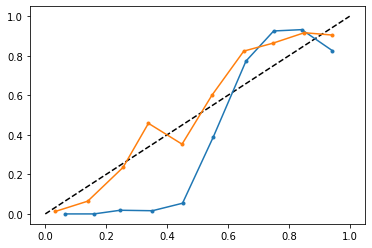

In [8]:
# plot perfectly calibrated
pyplot.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
pyplot.plot(mpv_uncalibrated, fop_uncalibrated, marker='.')
pyplot.plot(mpv_calibrated, fop_calibrated, marker='.')
pyplot.show()

# Mean Encoding (aka Target Encoding/Likelihood Encodings)

In its simplest form, we would have a feature that computes the mean of target of each category. 
- This is better than label encoding because it helps separate classes.
- Gradient Boosting Trees struggle to handle high cardinality random variables. So adding mean encoding will help reduce the depth of the tree and improve performance compared to the simple label encoding which gives random order to labels with no correlation with the target.
- It is especially helpful if the relationship between the feature and target is highly nonlinear.
- Be careful from overfitting because when adding features that use the target, we most likely overfit unless we do careful validation/CV.
- Ways to use target variable:
    - Likelihood = mean(target)
    - Weight of Evidence = ln(count(positive) / count(negative)) * 100
    - Count = sum(target)
    - Diff = count(positive) - count(negative)

## Regularization

For each data point in a given fold, we estimate the encoding using the data points in the other folds.
- It is robust and intuitive.
- Usually 4-5 folds are enough.
- If we have a category that is not present in other folds, use global mean of the target (prior).
- This method is stable for categories that are present is descent number.
- We can use smoothing as a form of regularization. Rare categories can be punished using smoothing.
- We can also add noise to the data. As noise increases -> more regularization and can destroy encoding. So noising level is a hyperparameter.
- We can also use expanding mean by predicting each data point encoding using $n - 1$ data points. This method is easy and has the least target leakage (built-in in CatBoost).

## Regression & Multicass Classification

- We can use many statistics such as percentiles, std, and bins distribution.
- With time series, we can use rolling statistics of target variable such as mean or sum.
- Binning and selecting interactions of numerical features:
    - We can fit a model such as XGBoost and analyze the model structure.
        - If a feature has a lot of split points, that is a good indication that we should use mean encodings on that feature. Also, those exact split points can be used to bin the features. 
        - To get good feature interactions, we can:
            - Loop over all the trees and calculate the frequency of feature interactions. The highest the frequency, the more useful the interactions. We can use this method with 1-ways, 3-ways, etc. interactions.

**Advice:** If we have a dataset with a lot of categorical features, it is worth it to try to use both mean encodings and interaction features.

## Correct Validation Reminder

- Estimate encodings of X_train.
- Map them to X_train and X_val.
- Regularize on X_tr.
- Validate the model on both X_train and X_val.
- When done:
    - Estimate encodings on combined X_train and X_val.
    - Map them to whole train and X_test.
    - Regularize on whole train.
    - Fit on whole train.

## Advantages/Disadvantages

- Advantages:
    - Compact transformation of categorical features.
    - Powerful basis for feature engineering.
- Disadvantages:
    - Need careful validation, there are a lot of ways to overfit.
    - Significant improvements only on specific datasets.

In [29]:
import category_encoders as ce
import pandas as pd

In [32]:
df = pd.DataFrame({'X': ['a', 'b', 'a', 'b', 'c'], 'y': [0, 0, 1, 1, 1]})

In [33]:
ce.TargetEncoder().fit_transform(df['X'], df['y'])

,X
0,0.526894
1,0.526894
2,0.526894
3,0.526894
4,0.600000


# Practical Tips

## Competition

1. Define your goal before you participate in any competition:
    - Learn more about an interesting problem
    - Get acquainted with new software tools
    - Get a medal
        - If people in the top have huge number of submissions -> mostly are doing probing or facing difficulty between validation and public leader board score
        - If people in the top have few submissions -> they discovered non-trivial way of solving the problem
2. After you enter competition:
    - Organize your ideas in some structure
    - Select most important and promising ideas
    - Try to understand the reasons why something does/doesn't work
    - Everything is a hyperparameter. Try to sort all parameters by their importance

## Data Loading

1. Do basic preprocessing and convert csv/txt files into hdfs(pandas)/npy(numpy arrays) for much faster loading
2. By default, data is stored in 64-bit arrays. Most of the times we can safely downcast to 32-bits that would save us a lot of memory
3. Large datasets can be processed in chunks

## Performance Evaluation

1. Extensive validation is not always needed. Even with a dataset that has 50k or 100k rows, a simple train/test split works. Switch to CV when needed only (when marginal improvements is critical)
2. Start with fastest models such as LightGBM
3. Below is a simple modeling process flow:
<img src="materials/modeling-process-flow.png" heigh="200" width="400">
4. Switch to ensemble and stacking when you are satisfied with feature engineering
5. Don't pay attention to code quality
6. Save only important things

## Initial Pipeline

1. Start with EDA
1. Start with simple or even primitive solution
3. Debug full pipeline
4. Start with simple model that is robust and requires small to no hyperparameter tuning
5. Check if the validation is stable

## Best Practices from Software Development

1. Use good variable names
2. Keep your research reproducible
    - Fix random seed
    - Write down exactly how each feature was generated
    - Use version control
3. Move reusable code into separate functions. It would be better if you create a simple library that includes a lot of the code that are commonly used in many problems

## General

1. Read scientific papers about the problem to get more knowledge and ideas about how to solve the problem. This usually helps with understanding of the features and generate new features as well as optimizing ML related tasks
2. Overfit the training data and then regularize the model

## Competition Pipeline

<img src="materials/competition-pipeline.png" height="100px" width="600px">

1. Make necessary preparations to understand the problem such as reading related materials and get more business understanding of the problem
    - Type of problem
    - How big is the data
    - Hardware needed
    - Software needed. Then create a virtual environment for the project
    - What is the metric being tested on?
    - Check if I have done similar project before and reuse what worked before trying anything new
2. Understand the features and what we have available. Also what are the dynamics and the process of the data generation
    - Plot histograms of variables and check if the feature is similar between train and test. In most cases, big discrepancies can cause problems to the model
    - Plot features versus target variable and versus time
    - Consider univariate predictability metrics such as R/IV/AUC
    - Binning numerical features to check if there are some nonlinearities
    - Correlation matrices (Spearman correlation)
3. Define a good validation strategy
    - Validation should be as close as possible to the test set
    - If time is important -> Use time-based split
    - If the test has different entities (such as customers) than the train, then validation data should have different entities so that it resembles the test data
    - If it is completely random, just use random split
4. Features Engineering <--> Modeling
    - <img src="materials/feature-engineering.png">
    - <img src="materials/modeling.png">
5. Ensembling
    - Averaging to multilayer stacking
    - Helps to average few low-correlated predictions
    - With stacking, we treat predictions as features and repeat the same modeling process in terms of feature engineering and feature generation

# Ensembling

The idea is to combine good models that are as uncorrelated as possible to get the best performance. The less correlated the models are, the less correlated the models' errors. This means averaging the models would lead to lower errors.

## Averaging

We have three ways to construct ensembles using:
- Simple average. Take the average of multiple models
- Weighted average. Assign weights to different models and combine them
- Conditional average. Pick different models for different values

## Bagging

RandomForest is a form of bagging where we build models on different subsets of the data and then combine the models. Bagging doesn't overfit but after some point there would be no improvement. It also can be parallelized.

There are two sources of errors in modeling:
- Errors due to **Bias** (underfitting)
- Errors due to **Variance** (overfitting)

Parameters that control bagging:
- Random seed, we can simply run the same model with different seeds and average predictions
- Row Subsampling or bootstrapping
- Column Subsampling
- Shuffling
- Model-specific parameters

## Boosting

**Boosting** is a form of weighted averaging of models where each model is built sequentially by taking into account the performance of the previous model. Boosting models can't be parallelized and more estimators can overfit.

### Weight-based Boosting 

<img src="materials/weight-based-boosting.png">

- We fit a model on all features and calculate the absolute error for all samples
- We then give more weights on rows that are very wrong and keep iterating
- `AdaBoost` is an example of weight-based boosting

Boosting parameters:
1. Learning rate (eta or shrinkage). It is the contribution of each model in the final prediction, i.e. it can be seen as weight of each model
2. Number of estimators (models). There is usually an inverse relationship between learning rate and the number of estimators. As learning rate decreases, we should increase the number of estimators. The way to tune them is by first fixing the number of estimators and tune the learning rate, then multiply the number of estimators by *c* and divide the learning rate by *c* and see how it works
3. Input model - any model that accepts weights

### Residual-based Boosting

<img src="materials/residual-based-boosting.png">

It is more powerful than the weight-based boosting.
- We fit a model on all features and calculate the error for all samples
- Then the resulted error would be the new target variable
- We then fit another model on the new target variable and keep iterating
- `XGBoost` is an example of residual-based boosting

Boosting parameters:
1. Learning rate (eta or shrinkage). The first model would have fully contribute and then from 2nd model the contribution would be $lr * \hat{y}$. Therefore, it is movement in the direction of the error so that we avoid overfitting.
2. Number of estimators (models). There is usually an inverse relationship between learning rate and the number of estimators. As learning rate decreases, we should increase the number of estimators. The way to tune them is by first fixing the number of estimators and tune the learning rate, then multiply the number of estimators by *c* and divide the learning rate by *c* and see how it works.
- Row Subsampling
- Column Subsampling
- Input model - better with trees

Implementations:
1. XGBoost
2. LightGBM - very fast and efficient
3. Catboost - handles missing values and categorical features out of the box. Plus it has good starting hyperparameters

## Stacking

**Stacking** means making predictions of a number of models (base learners) on a hold-out dataset and then use a different model (meta learner) to train on these predictions.

Things to be mindful of:
1. Diversity is as important as performance of base learners
2. Diversity may come from:
    - Different algorithms
    - Different input features, i.e. we may have the same model run on different features transformations
    - No risk of overfitting but after N models, the performance will plateau
    - The meta model is usually not that complex because the predictions are already correlated with the target variable. Therefore, the model may not need to a lot of operations to uncover hidden structures

**StackNet** is a scalable meta modeling methodology that utilizes stacking to combine multiple models in a neural network architecture of multiple models.

## Tips

1. 1st level tips:
    - Diversity based on algorithms 
        - 2-3 gradient boosted trees using maybe different implementation such as LightGBM, XGBoost, and CatBoost or try to have one with small depth, one with middle depth, and one with deep depth and tune the hyperparameters around it. This way you would have as much asymmetry as possible in terms of performance
        - 2-3 NN with different architectures
        - 1-2 ExtraTrees/RandomForest
        - 1-2 linear models such as logistic/ridge/svm
        - 1-2 KNN models. They may have bad performance but usually add value in meta modeling setup
    - Diversity based on input data
        - Categorical features: such as label encoding, onehot encoding, etc
        - Numerical feature: such as binning, outliers, percentiles 
        - Interactions: such as multiplication/division, groupby, unsupervised (SVD/PCA/KMeans...)
2. Subsequent level tips:
    - Shallower/simpler algorithms        

# Hyperparameter Tuning

How do we tune hyperparameters:
1. Select the most important hyperparameters. We can get this list using multiple online resources/documentation.
2. Understand how exactly they influence the training
3. Tune them either manually or automatically (such as hyperopt)

Libraries for hyperparameter optimization:
- Hyperopt
- Scikit-optimize
- Spearmint
- GPyOpt
- RoBO
- SMAC3

## GBDT

- Hyperparameters with green color means the complexity of the model increases as their values increase.
- Hyperparameters with red color means the complexity of the model decreases as their values increase.

<img src="materials/GBDT.png">

1. If increasing the depth of tree is not causing the model to overfit, this means there are better interactions that can be extracted from the data. `max_depth` of 7 is a good starting point. Be careful that the higher the depth the longer it takes to train.
2. `subsample` is the fraction of objects used when fitting a tree, [0, 1]. With lesser objects, the model takes more time to capture the underlying structure but will be more generalizable. Therefore, it can be seen as a regularizer.
3. `colsample_bytree` and `colsample_bylevel` is the fraction of features used when fitting a tree. Same consequence as `subsample`.
4. `min_child_weight` is one of the most important one to tune. The higher the value the more constrained the model is.
5. `eta` and `num_round`. The higher the learning rate the faster the model fit the training dataset but most likely would overfit. The best strategy is to freeze the learning rate, say 0.1, and tune the number of trees using early stopping. Then multiply the number of trees by $\alpha$ and divide the learning rate by $\alpha$. This usually improves the scores.
6. `seed` is usually fixed to be able to reproduce the model. However, if same model with different random seeds have totally different validation scores, then that is a sign that either the validation scheme is not good or the results are random.

## RandomForest/ExtraTrees

1. `num_estimators` the higher the better without the risk of overfitting because models are independent. Try first multiple values and plot the validation curve to select the best value since after some point the performance plateau.
2. `max_features` is similar to `colsample` in GBDT.
3. `max_depth` is usually higher than GBDT. 7 is a good starting point.
4. `min_sample_leaf` is the same as `min_child_weight` in GBDT.
5. `criterion` which can be *gini* or *entropy*. *gini* works better most of the times.

The most important ones are the first two.

## Tuning Methods

### Random Search

It is much better than Grid Search especially if some hyperparameter are not that important compared to other ones. We usually use random distributions for the hyperparameters.

### Bayesian Optimization 

Also called sequential model based optimization SMBO):
- Fit 'cheap' probabilistic function to black-box
- We pick next point using exploration / exploitation
- Implemented as acquisition function

A surrogate is a function that approximates an objective function. The surrogate is useful because it takes little time to evaluate. So, for example, to search for a point that minimizes an objective function, simply evaluate the surrogate on thousands of points, and take the best value as an approximation to the minimizer of the objective function.

Surrogate optimization is best suited to time-consuming objective functions. The objective function need not be smooth, but the algorithm works best when the objective function is continuous.

Surrogate optimization attempts to find a global minimum of an objective function using few objective function evaluations. To do so, the algorithm tries to balance the optimization process between two goals: exploration and speed.

Exploration to search for a global minimum.
Speed to obtain a good solution in few objective function evaluations.
The algorithm has been proven to converge to a global solution for continuous objective functions on bounded domains.

In general, there is no useful stopping criterion that stops the solver when it is near a global solution. Typically, you set a stopping criterion of a number of function evaluations or an amount of time, and take the best solution found within this computational budget.

### Multi-Fidelity Search

Approximate the function by similar cheaper function. The idea is to fit the model on a small subset of the data and pick the best hyperparameters. Usually values for best hyperparameters don't change much if at all when training on full dataset. We can also run the model for fewer number of iterations instead of waiting to finish training.

Given n configurations and budget B:
- Pick η=2, η = 3 (wording follows 2)
- Each iteration, keep best halve of configurations
- After k=logη(n)+1, left with single configuration.
- Initially allocate $\frac{B}{kn}$ to each configuration, double each iteration

For example, if we have configurations n = 81 and total budget B = 20000:
- train 81 configurations with resources   41
- train 27 configurations with resources  123
- train  9 configurations with resources  370
- train  3 configurations with resources 1111
- train  1 configurations with resources 3333

Therefore, resources total: 16638

### Meta-learning

Learning from experience (other datasets). So basically every dataset is a sample and we learn from each dataset what is the best configuration.

# Advanced Feature Engineering

- We can calculate statistics by groups of categories or one category such as minimum price by category and add those generated features as new features.
- We can also use statistics applied to neighbors such as number of houses in 500m radius.
- We can use matrix factorization techniques such as PCA/SVD/NMF. It is useful for tree-based models.
- Interactions can be generated for both numerical and categorical features such as sum, mult, diff, division for numerical features and all possible combination of categorical features. Then use feature selection such as feature importance from RandomForest to select the best ones.
    - We also use decision trees such as RandomForest or XGBoost to transform matrices into indices.
   
- tSNE: It is a manifold learning method that projects data into lower dimension while preserving the distance between points.
    - The projections are highly dependable on hyperparameters mainly perplexities.
    -  It is stochastic in nature, so it may provide different results for the same data/hyperparameters.
    - It is slow if we have huge number of features. So we may need to use PCA then tSNE.
    - It sometimes shows cluster that does not exist in original data.

# CatBoost

**CatBoost** is stable and has good performance with default hyperparameters.

Problems with gradient boosting that CatBoost tries to solve:
1. Categorical features:
    - Uses one-hot encoding for features with <= max_size categories
    - Computes number of appearances for each category
    - Statistics with label usage on a random permutation of the data such as mean encoding
        - The way it is done is by using random permutation that calculates, for example, the average target value for object with the same categories that were before the current category
        - Other useful statistics can be used too
    - Statistics on feature combinations. This is usually done during each split where combinations are useful because the number of possible combinations grow exponentially with the number of categorical features
    - Generates combinations of numerical and categorical features too
    
2. Hyperparameter tuning
3. Prediction speed
4. Overfitting. Traditional calculation of gradient of leaf value is by average the gradients of the objects that make up the node that the model was trained on. This will make it biased and more likely to overfit. With CatBoost, we average the gradients of all the past objects.
5. Training speed

CatBoost uses **Symmetric Decision Trees** where nodes on the same layer have the same split. This will help in terms of making the model less prune to overfitting and stable. Plus it is 30-60x faster than XGBoost.

To speedup training, we can use `rsm` that specifies that fraction of features to look at on each split. With lower `rsm`, we need more iterations but overall speed will be faster.

The support for missing values are good out of the box. It treats missing values in categorical features as its own categories and for numerical features it is replaced with values either higher or lower than the past objects and put into its own nodes.

We can use early stopping to stop training after validation errors stop improving.

